In [1]:
import pylab
import numpy as np
import random
import math

In [2]:
L = 20
N = L**2 #number of spins
J = 1.0 #coupling strength

In [3]:
#graphical visualisation of spins

def create_picture(positions,colors): 
    pylab.figure(figsize=[5,5])
    pylab.cla()
    pylab.axis([0,L,0,L])
    pylab.setp(pylab.gca())
    for pos,col in zip(positions,colors):
        square=pylab.Rectangle((pos[0],pos[1]),0.8,0.8,fc=col)
        pylab.gca().add_patch(square)
    pylab.show()    

def color(i):
    if i==1: return 'r' #Red:'up'
    else: return 'b' #Blue: 'down'

In [4]:
# compute neighbours for ith spin (identification of opposite edges is taken into account)

def right(i): # neighbor to the right
     if(i+1)%L==0:return i+1-L
     else: return i+1
    
def left(i): # neighbor to the left
    if i%L==0:return i-1+L
    else: return i-1
    
def up(i): # neighbor up
    return(i+L)%N

def down(i):#neighbor down
    return (i-L+N)%N

In [5]:
neighbors = [[right(i),left(i),up(i),down(i)] for i in range(N)] # neighbor table
coordinates = [[i%L,i//L] for i in range(N)] # coordinates of spins(squares) for graphical output

orientations = [-1,1]
spins = []
colors = []

# Initial random spin assignment

for i in range(N):
    spin=random.choice(orientations)
    spins.append(spin)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

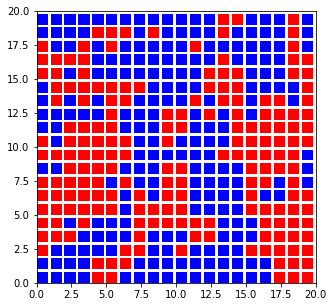

In [6]:
colors = []

nsteps = 1000*N # Number of steps in the Metropolis algorithm
T = 3.0 # Temperature measured in units of J/K_B
beta = 1/T

# Metropolis algorithm

for step in range(nsteps):
    k = random.randint(0,N-1) # Random spin choice
    delta_E = 2.0*spins[k]*np.sum(np.fromiter((spins[j] for j in neighbors[k]),float)) # Change in energy
    if random.uniform(0.0,1.0) < math.exp(-beta*delta_E): # Metropolis acceptance probability
        spins[k] *= -1

for i in range(N):
    colors.append(color(spins[i]))

create_picture(coordinates,colors)
pylab.show()